In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

In [341]:
sns.set(style='whitegrid', context='notebook')

In [343]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# DATA CLEANING

In [346]:
# Display the first few rows of the dataset to get an initial understanding of the data.
print(df.head())

   MolLogP    MolWt  NumRotatableBonds  AromaticProportion  logS
0   2.5954  167.850                0.0                 0.0 -2.18
1   2.3765  133.405                0.0                 0.0 -2.00
2   2.5938  167.850                1.0                 0.0 -1.74
3   2.0289  133.405                1.0                 0.0 -1.48
4   2.9189  187.375                1.0                 0.0 -3.04


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [350]:
# Check for missing values in the dataset.
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64


In [352]:
# Fill missing values with the median of each column.
df.fillna(df.median(), inplace=True)

# OUTLIER DETECTION

In [355]:
z_scores = np.abs(df.apply(zscore))
threshold = 3
df_cleaned = df[(z_scores < threshold).all(axis=1)]

# **UNIVARIATE ANALYSIS**

In [358]:
print(df.describe())

           MolLogP        MolWt  NumRotatableBonds  AromaticProportion  \
count  1144.000000  1144.000000        1144.000000         1144.000000   
mean      2.449133   204.631675           2.173951            0.364932   
std       1.866003   102.620500           2.627398            0.343305   
min      -7.571400    16.043000           0.000000            0.000000   
25%       1.414900   122.126000           0.000000            0.000000   
50%       2.340300   183.594500           1.000000            0.375000   
75%       3.406475   270.715750           3.000000            0.666667   
max      10.388600   780.949000          23.000000            1.000000   

              logS  
count  1144.000000  
mean     -3.057997  
std       2.096502  
min     -11.600000  
25%      -4.332250  
50%      -2.870500  
75%      -1.600000  
max       1.580000  


## Histograms for all numeric variables

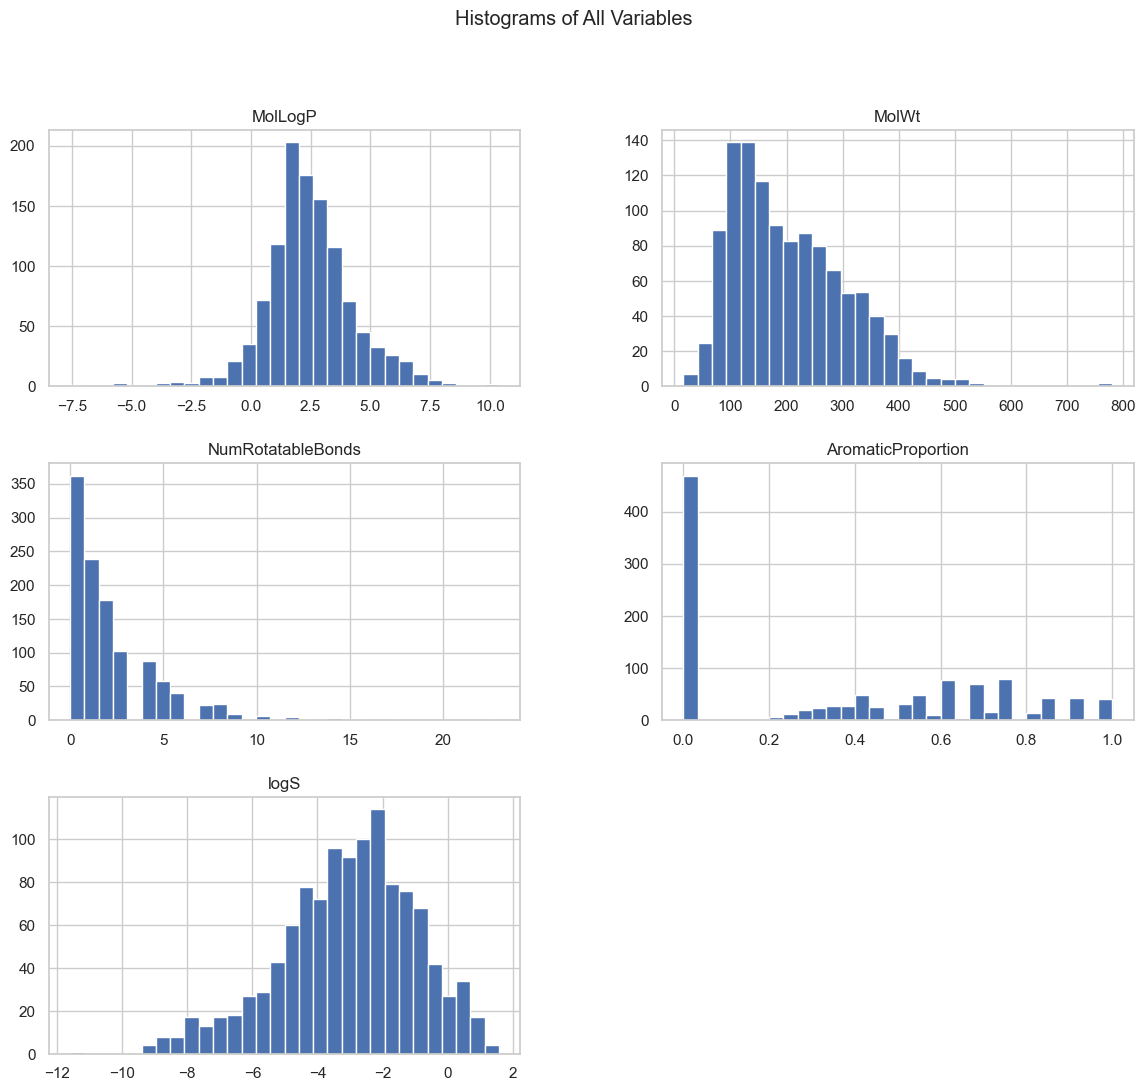

In [361]:
# Plot histograms for all numeric variables to visualize their distributions.
df.hist(figsize=(14, 12), bins=30)
plt.suptitle('Histograms of All Variables')
plt.show()

## Box plots

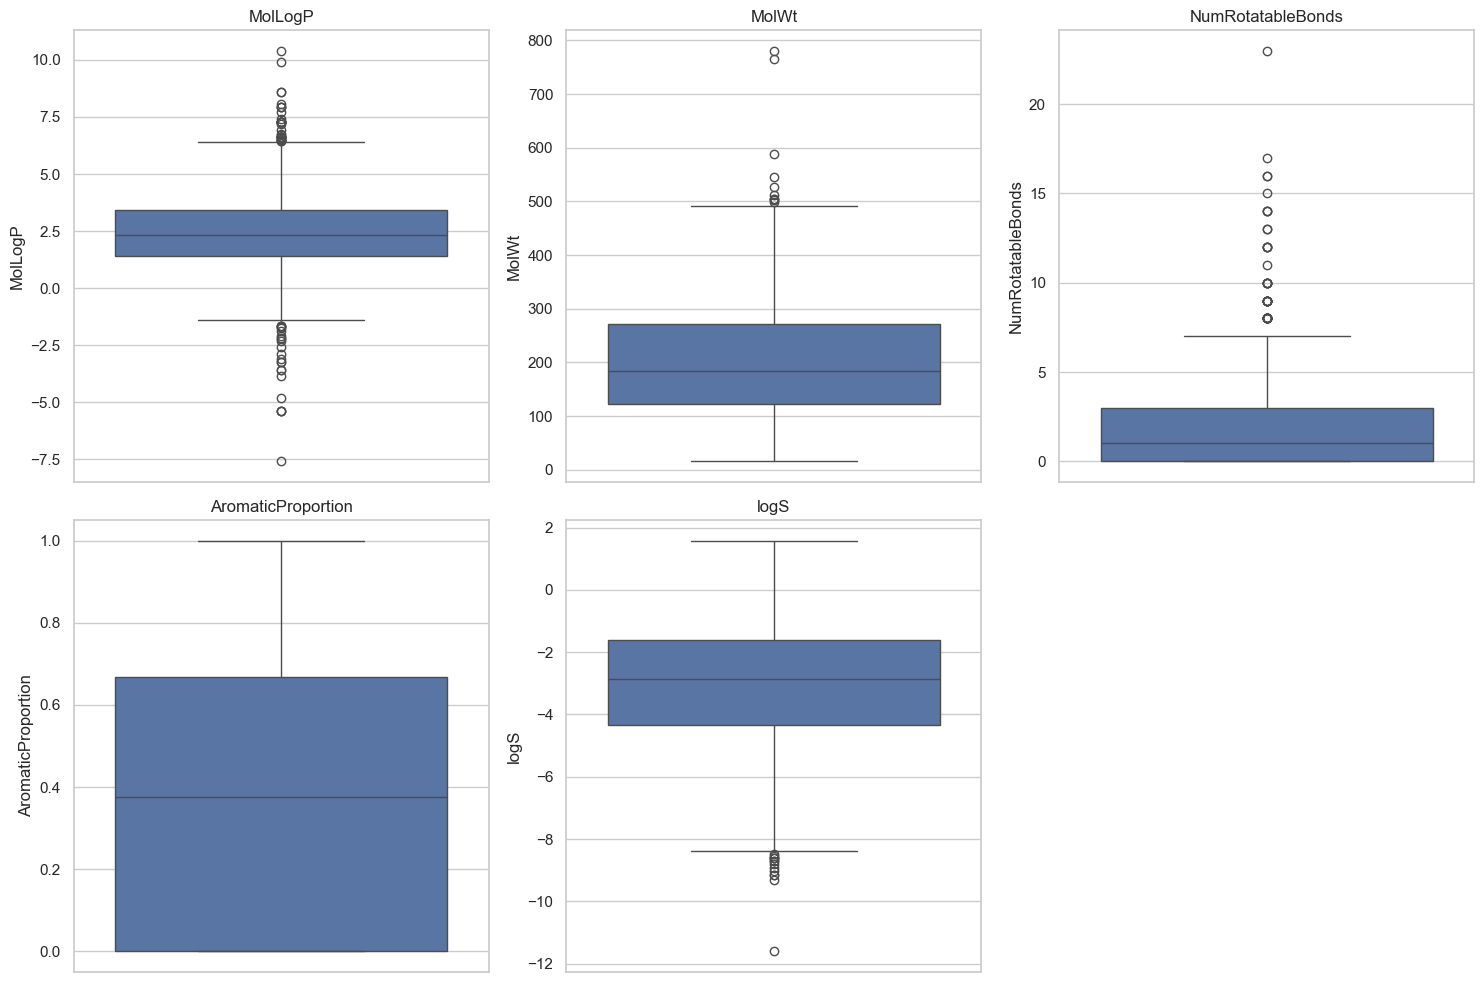

In [364]:
# Display box plots for each numeric variable to identify outliers and the spread of data.
plt.figure(figsize=(15, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Violin plots

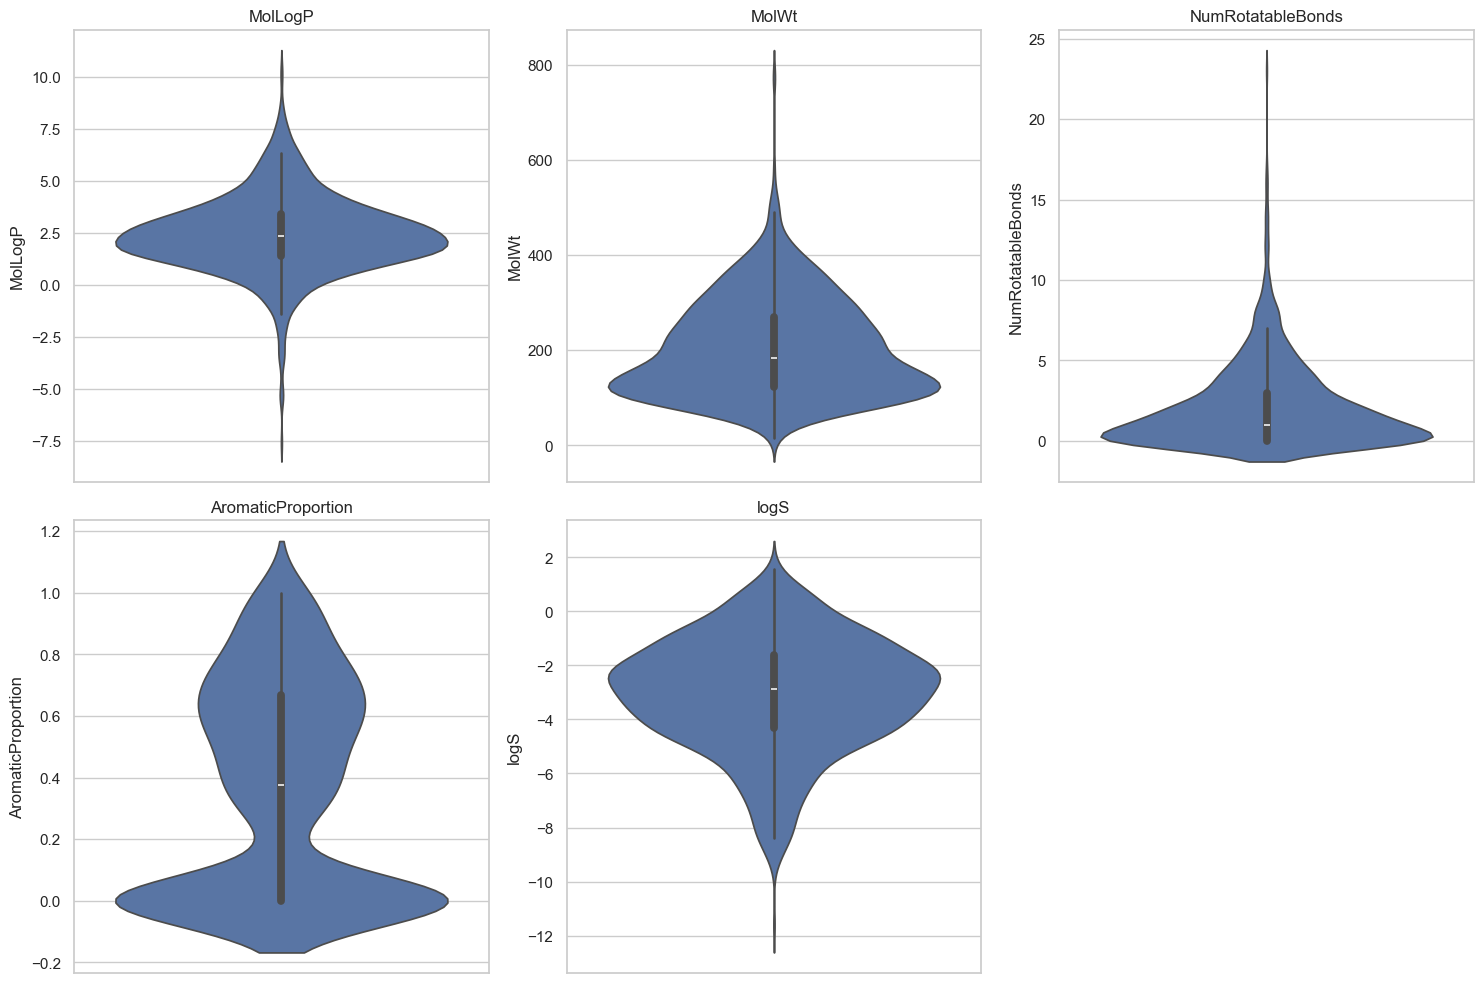

In [367]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Skewness and Kurtosis

In [370]:
# Calculate skewness and kurtosis for each variable to understand the distribution shape.
print("Skewness and Kurtosis:")
for col in numeric_cols:
    print(f'{col}: Skewness = {skew(df[col])}, Kurtosis = {kurtosis(df[col])}')

Skewness and Kurtosis:
MolLogP: Skewness = -0.01296513214694116, Kurtosis = 2.4881156615279796
MolWt: Skewness = 0.8893087911387616, Kurtosis = 1.2006569714187405
NumRotatableBonds: Skewness = 2.1553469325812156, Kurtosis = 7.4656953957553185
AromaticProportion: Skewness = 0.22600553751344823, Kurtosis = -1.413589090080197
logS: Skewness = -0.4839545835670128, Kurtosis = 0.16414203376299952


## Kernel Density Distribution

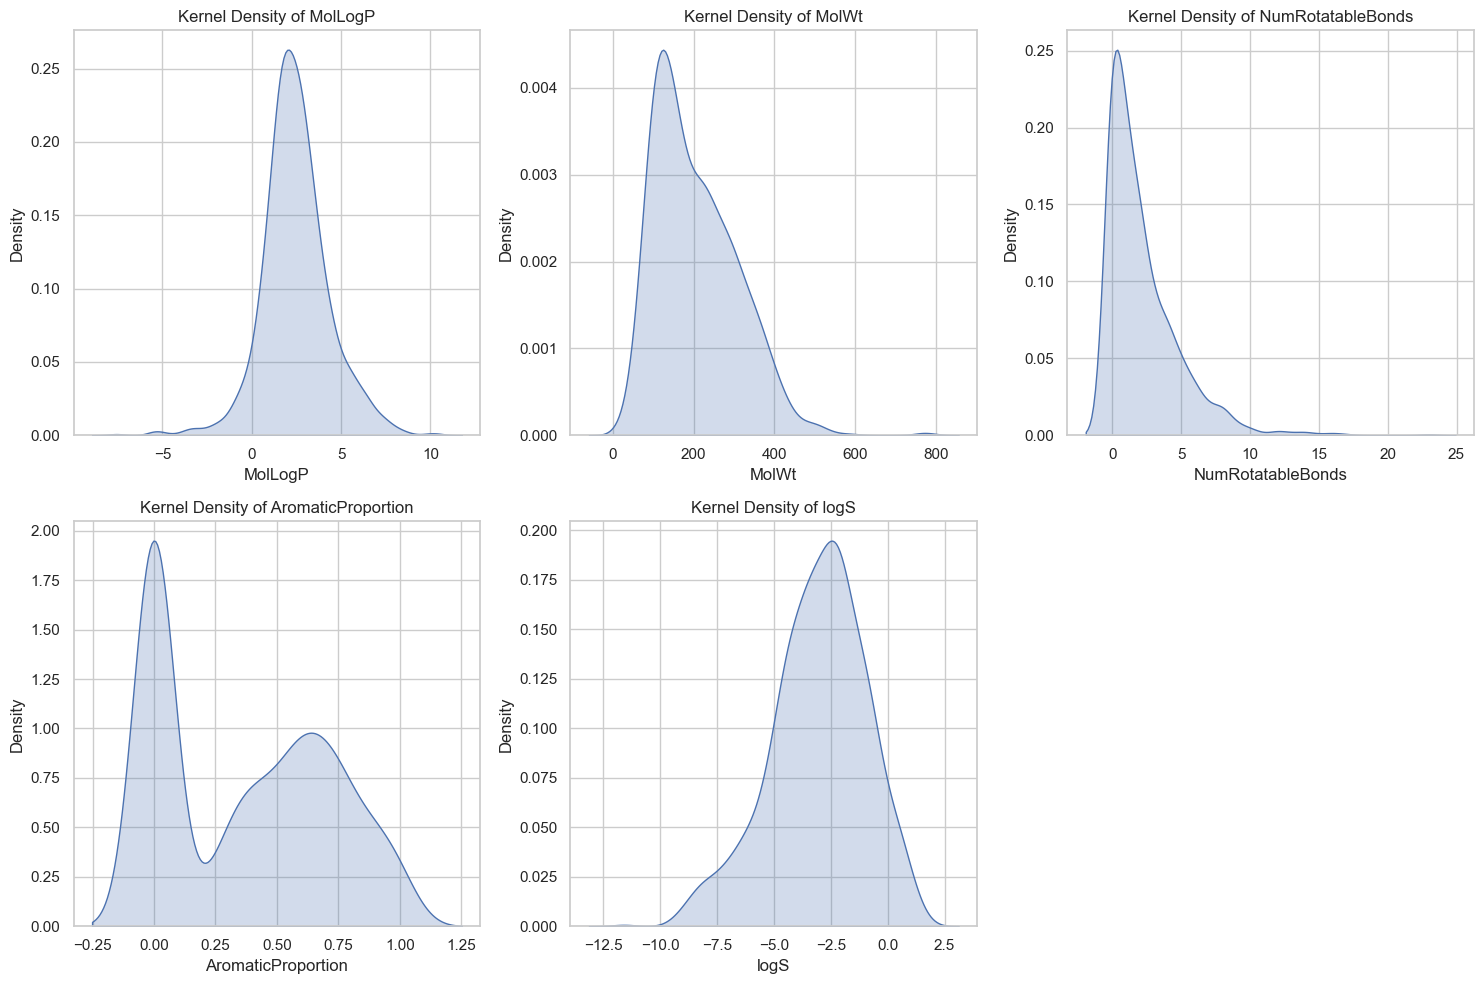

In [373]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Kernel Density of {col}')
plt.tight_layout()
plt.show()

## Data Distribution

#### Distribution Plots for Target Variable: Visualize the distribution of the target variable 'logS' using a histogram and a KDE plot to understand its distribution.

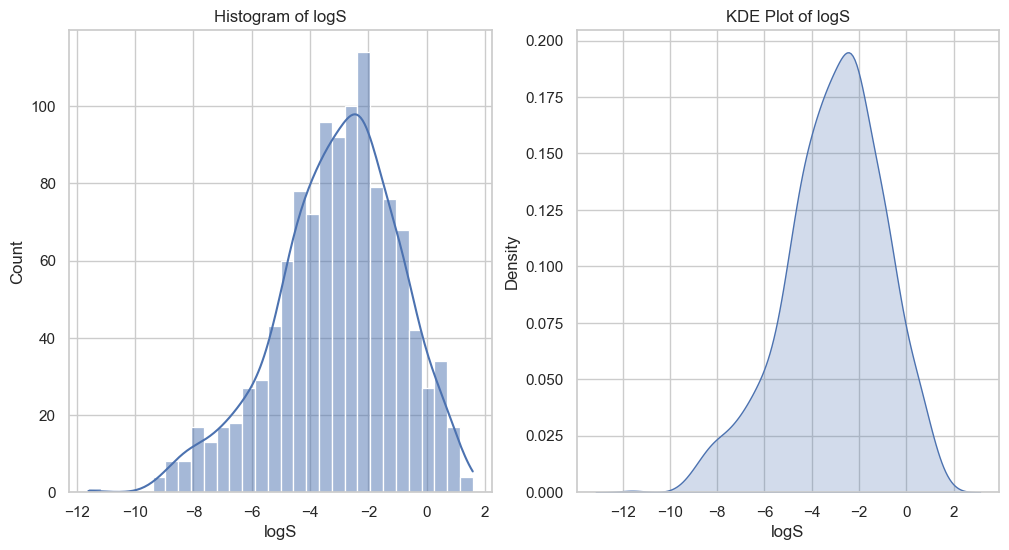

In [377]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['logS'], bins=30, kde=True)
plt.title('Histogram of logS')

plt.subplot(1, 2, 2)
sns.kdeplot(df['logS'], fill=True)
plt.title('KDE Plot of logS')
plt.show()

## Outliers Using IQR

In [380]:
print("Outliers using IQR:")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

Outliers using IQR:
MolLogP               57
MolWt                 10
NumRotatableBonds     54
AromaticProportion     0
logS                  14
dtype: int64


## **UNIVARIATE ANALYSIS CONCLUSION**


1. **Distribution Analysis:**
   - Significant skewness detected in several features
   - Varying degrees of kurtosis indicating different tail behaviors
   - Presence of both left-skewed and right-skewed distributions

2. **Outlier Detection:**
   - Box plots revealed significant outliers in multiple variables
   - Identification of extreme values that may influence analysis
   - Assessment of outlier impact on distribution shapes

3. **Statistical Measures:**
   - Skewness values quantifying asymmetry in distributions
   - Kurtosis measurements indicating peak characteristics

# **MULTIVARIATE ANALYSIS**

In [386]:
corr = df.corr()

## Correlation Matrix

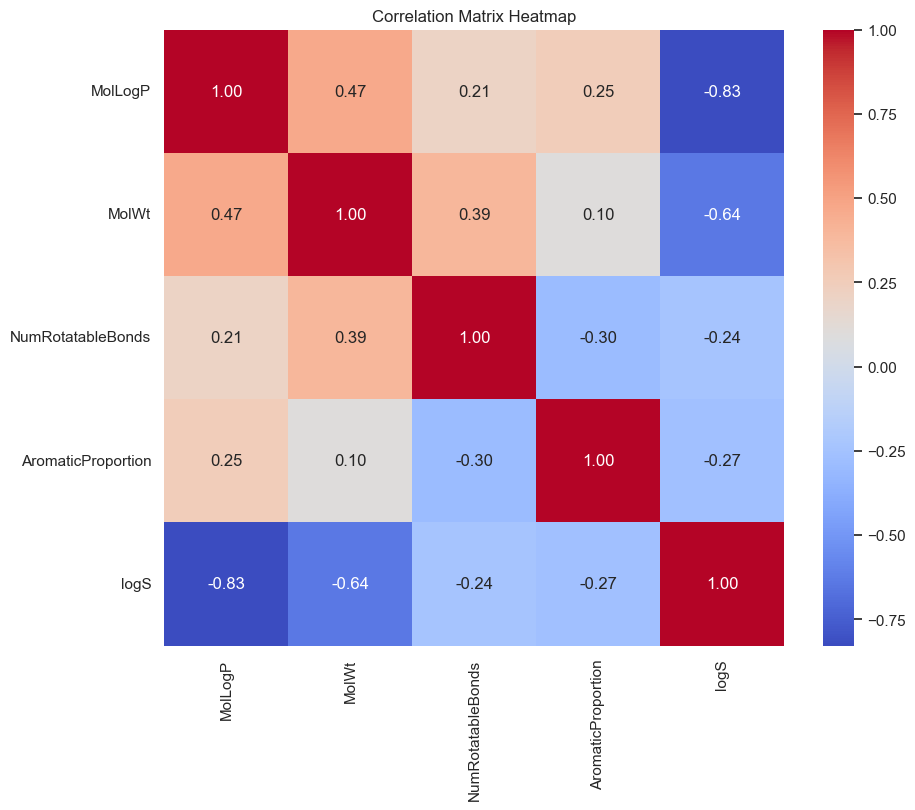

In [389]:
# Calculate and visualize the correlation matrix to identify relationships between variables.
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## PAIR PLOT

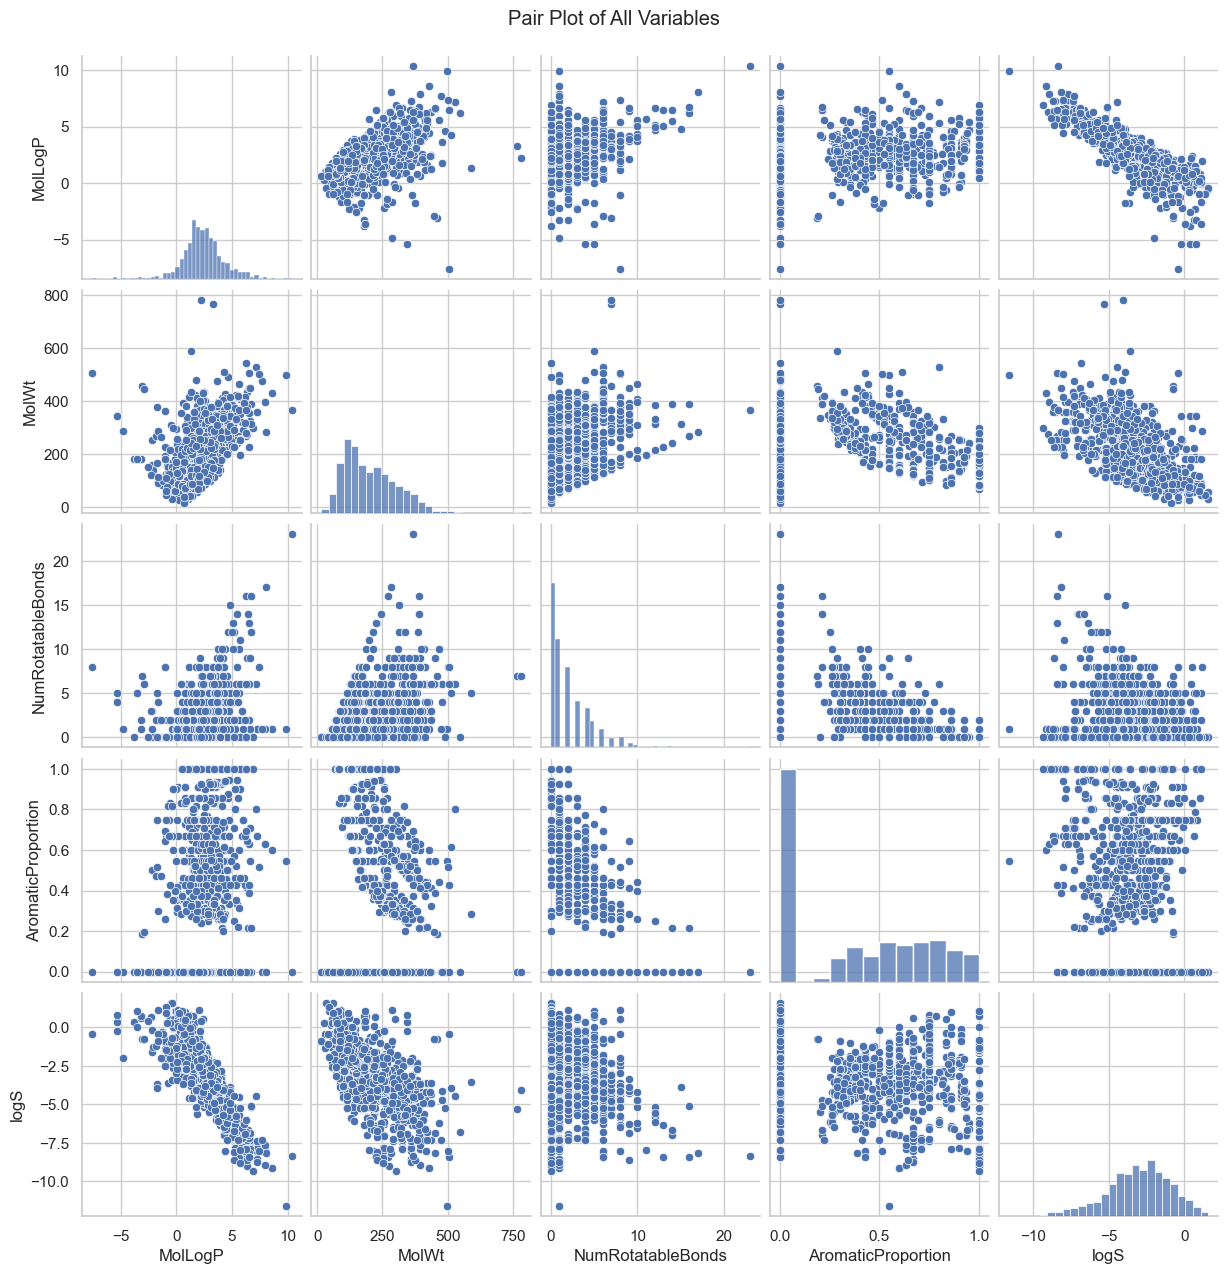

In [392]:
# Create pair plots to visualize relationships between pairs of variables.
sns.pairplot(df)
plt.suptitle('Pair Plot of All Variables', y=1.02)
plt.show()

In [393]:
features = [col for col in df.columns if col != 'logS']

## SCATTER PLOT

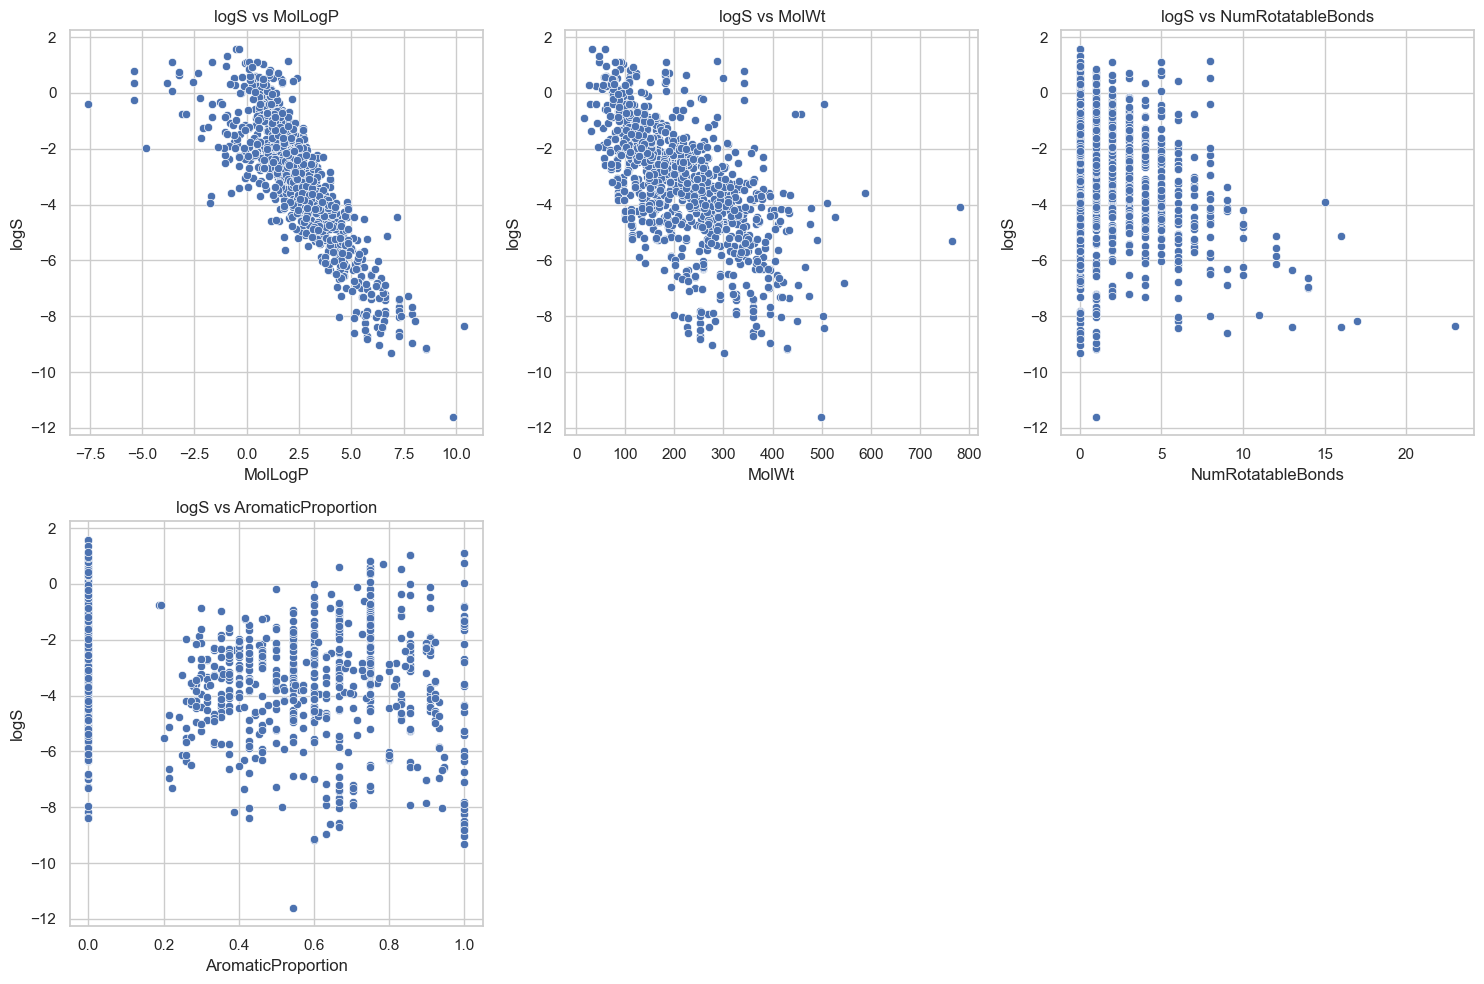

In [395]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['logS'])
    plt.xlabel(feature)
    plt.ylabel('logS')
    plt.title(f'logS vs {feature}')
plt.tight_layout()
plt.show()

## FACETED HISTOGRAM

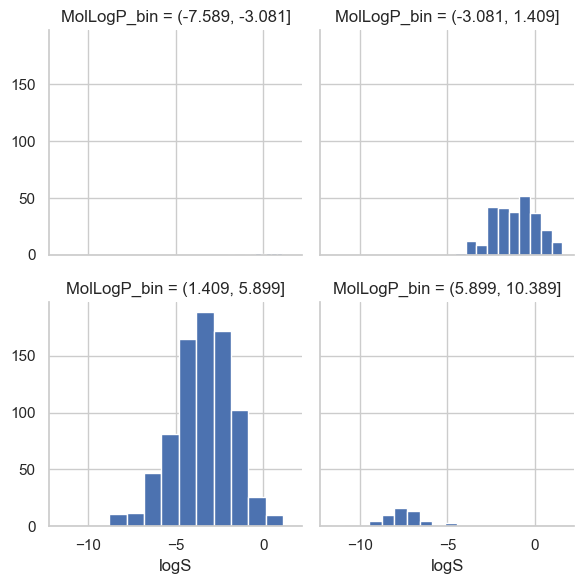

In [412]:
df['MolLogP_bin'] = pd.cut(df['MolLogP'], bins=4)
facet = sns.FacetGrid(df, col="MolLogP_bin", col_wrap=2, height=3, aspect=1)
facet.map(plt.hist, "logS")
plt.show()

## 3D SCATTER PLOT

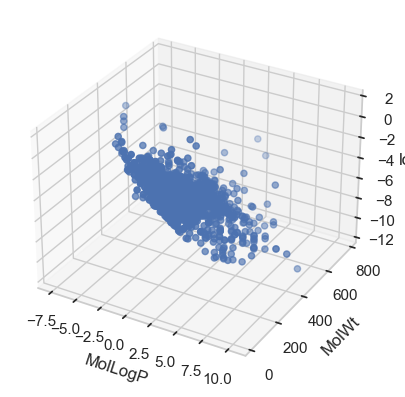

In [399]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MolLogP'], df['MolWt'], df['logS'])
ax.set_xlabel('MolLogP')
ax.set_ylabel('MolWt')
ax.set_zlabel('logS')
plt.show()

## HYPOTHESIS TESTING

### T-Test

In [403]:
from scipy.stats import ttest_ind

group1 = df[df['MolLogP'] <= df['MolLogP'].median()]['logS']
group2 = df[df['MolLogP'] > df['MolLogP'].median()]['logS']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

T-test: t-statistic = 33.250858352239746, p-value = 4.171591538950977e-170


## **MULTIVARIATE ANALYSIS CONCLUSION**

1. **Visualization Techniques Employed:**
   - Pair plots: Displaying relationships between multiple variables simultaneously
   - Scatter plots: Examining binary relationships between variables
   - 3D plots: Visualizing three-dimensional relationships between key descriptors and logS
   - Correlation matrix: Quantifying relationships between all variables

2. **Key Findings:**
   - Strong correlations identified between molecular descriptors and logS
   - Notable relationships discovered between physicochemical properties
   - Identification of potential non-linear relationships
   - Detection of outliers and their impact on correlations

3. **Correlation Matrix Analysis:**
   - Quantified strength of variable relationships
   - Identified both positive and negative correlations
   - Highlighted multicollinearity between descriptors
   - Prioritized most significant descriptors for modeling